###  face recognation opencv2

In [94]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import os

haar_cascade = cv.CascadeClassifier('haar_face.xml')

DIR = r'C:\Users\user\Desktop\AI_tasks\images'
features=[]
X_images = []
counter=0
for imgfolder in os.listdir(DIR):
    counter=counter+1
    if(counter>500):
        break
    for filename in os.listdir(DIR + '\\' + imgfolder):
        filename = DIR +'\\'+ imgfolder + '\\' + filename
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (100,100))
        X_images.append(img)
        faces_rect = haar_cascade.detectMultiScale(img, 1.086, 4)

        for (x,y,w,h) in faces_rect:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            faces_roi = img[y:y+h, x:x+w]
            features.append(faces_roi)
           
X_images = np.array(X_images)
print(X_images.shape)
features= np.array(features, dtype='object')
print(features.shape)

(1156, 100, 100)
(1156,)


In [22]:
def show_image(image):
   plt.axis("off")
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
   plt.show()

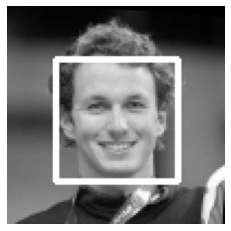

In [143]:
show_image(X_images[5])

In [92]:
labels = []
counter=0
for imgfolder in os.listdir(DIR):
    counter=counter+1
    if(counter>500):
        break
    for filename in os.listdir(DIR + '\\' + imgfolder):
        labels.append(imgfolder)
labels = np.array(labels)
labels.shape

(1156,)

In [142]:
#check that labels match images
labels[5]

'Aaron_Peirsol'

In [115]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,code)

In [104]:
unique, counts = np.unique(labels, return_counts=True)
unique

array(['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel',
       'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin',
       'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami',
       'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi',
       'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman',
       'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi',
       'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah',
       'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco',
       'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman',
       'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert',
       'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler',
       'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila',
       'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser',
       'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus',
       'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell',
       'Adrian_Nastase', 

In [112]:
code=[]
for label in labels: 
    for i in range(len(unique)):
        if(label==unique[i]):
            print(label+" "+str(i))
            code.append(i)
            break
code=np.array(code)


Aaron_Eckhart 2
Aaron_Guiel 3
Aaron_Patterson 4
Aaron_Peirsol 5
Aaron_Peirsol 5
Aaron_Peirsol 5
Aaron_Peirsol 5
Aaron_Pena 6
Aaron_Sorkin 7
Aaron_Sorkin 7
Aaron_Tippin 8
Abbas_Kiarostami 10
Abba_Eban 9
Abdel_Aziz_Al-Hakim 11
Abdel_Madi_Shabneh 12
Abdel_Nasser_Assidi 13
Abdel_Nasser_Assidi 13
Abdoulaye_Wade 14
Abdoulaye_Wade 14
Abdoulaye_Wade 14
Abdoulaye_Wade 14
Abdulaziz_Kamilov 17
Abdullah 18
Abdullah 18
Abdullah 18
Abdullah 18
Abdullah_Ahmad_Badawi 19
Abdullah_al-Attiyah 22
Abdullah_al-Attiyah 22
Abdullah_al-Attiyah 22
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Gul 20
Abdullah_Nasseef 21
Abdullatif_Sener 23
Abdullatif_Sener 23
Abdul_Majeed_Shobokshi 15
Abdul_Rahman 16
Abel_Aguilar 24
Abel_Pacheco 25
Abel_Pacheco 25
Abel_Pacheco 25
Ab

In [114]:
code.dtype

dtype('int32')

In [147]:
#test model
def test(img,scaleFactor):


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    # Detect the face in the image
    faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor, 4)

    for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h,x:x+w]

        label, confidence = face_recognizer.predict(faces_roi)
        print(f'Label = {unique[label]} with a confidence of {confidence}')

    
        cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

    show_image(img)

Label = Andy_Roddick with a confidence of 108.19705520199122


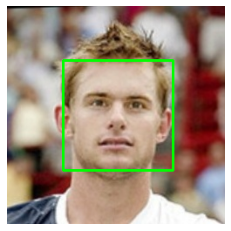

In [148]:
img = cv2.imread(r'C:\Users\user\Desktop\AI_tasks\Andy_Roddick_0007.jpg')
test(img,1.07)

Label = Abdullah_Gul with a confidence of 102.4129085138453


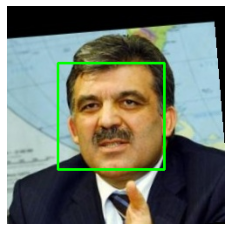

In [164]:
img = cv2.imread(r'C:\Users\user\Desktop\AI_tasks\Abdullah_Gul.jpg')
test(img,1.08)